Сначала разберемся, как получить информацию с внешнего сервиса. Для этого есть много библиотек, самой распространенной является requests. Импортируем ее и отправим запрос к сервису:

In [1]:
import requests
r = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')

In [2]:
print(r)

<Response [200]>


In [3]:
print(r.status_code) #в виде числа ответ

200


In [4]:
print(r.text)

{
    "Date": "2019-03-15T11:30:00+03:00",
    "PreviousDate": "2019-03-14T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2019\/03\/14\/daily_json.js",
    "Timestamp": "2019-03-14T16:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 46.2066,
            "Previous": 46.319
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 38.5512,
            "Previous": 38.6614
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов Соединенного королевства",
            "Value": 87.1156,
            "Previous": 86.1446
    

Однако работать с ответом сервера в виде строки крайне неудобно. Гораздо проще вызвать метод json(), который сразу преобразует строку в словарь:

In [5]:
data = r.json()
data

{'Date': '2019-03-15T11:30:00+03:00',
 'PreviousDate': '2019-03-14T11:30:00+03:00',
 'PreviousURL': '//www.cbr-xml-daily.ru/archive/2019/03/14/daily_json.js',
 'Timestamp': '2019-03-14T16:00:00+03:00',
 'Valute': {'AMD': {'CharCode': 'AMD',
   'ID': 'R01060',
   'Name': 'Армянских драмов',
   'Nominal': 100,
   'NumCode': '051',
   'Previous': 13.4074,
   'Value': 13.4268},
  'AUD': {'CharCode': 'AUD',
   'ID': 'R01010',
   'Name': 'Австралийский доллар',
   'Nominal': 1,
   'NumCode': '036',
   'Previous': 46.319,
   'Value': 46.2066},
  'AZN': {'CharCode': 'AZN',
   'ID': 'R01020A',
   'Name': 'Азербайджанский манат',
   'Nominal': 1,
   'NumCode': '944',
   'Previous': 38.6614,
   'Value': 38.5512},
  'BGN': {'CharCode': 'BGN',
   'ID': 'R01100',
   'Name': 'Болгарский лев',
   'Nominal': 1,
   'NumCode': '975',
   'Previous': 37.8624,
   'Value': 37.8747},
  'BRL': {'CharCode': 'BRL',
   'ID': 'R01115',
   'Name': 'Бразильский реал',
   'Nominal': 1,
   'NumCode': '986',
   'Previo

Теперь очень просто извлечь данные о курсах валют из ответа сервера. Для этого достаточно обратиться к ключу словаря 'Valute':

In [7]:
data['Valute']

{'AMD': {'CharCode': 'AMD',
  'ID': 'R01060',
  'Name': 'Армянских драмов',
  'Nominal': 100,
  'NumCode': '051',
  'Previous': 13.4074,
  'Value': 13.4268},
 'AUD': {'CharCode': 'AUD',
  'ID': 'R01010',
  'Name': 'Австралийский доллар',
  'Nominal': 1,
  'NumCode': '036',
  'Previous': 46.319,
  'Value': 46.2066},
 'AZN': {'CharCode': 'AZN',
  'ID': 'R01020A',
  'Name': 'Азербайджанский манат',
  'Nominal': 1,
  'NumCode': '944',
  'Previous': 38.6614,
  'Value': 38.5512},
 'BGN': {'CharCode': 'BGN',
  'ID': 'R01100',
  'Name': 'Болгарский лев',
  'Nominal': 1,
  'NumCode': '975',
  'Previous': 37.8624,
  'Value': 37.8747},
 'BRL': {'CharCode': 'BRL',
  'ID': 'R01115',
  'Name': 'Бразильский реал',
  'Nominal': 1,
  'NumCode': '986',
  'Previous': 17.2014,
  'Value': 17.1457},
 'BYN': {'CharCode': 'BYN',
  'ID': 'R01090B',
  'Name': 'Белорусский рубль',
  'Nominal': 1,
  'NumCode': '933',
  'Previous': 30.7223,
  'Value': 30.6663},
 'CAD': {'CharCode': 'CAD',
  'ID': 'R01350',
  'Name

In [9]:
data['Valute']['INR']['ID']

'R01270'

Давайте оформим наши вычисления в отдельную функцию, которой будет удобно пользоваться. На вход она должна принимать два параметра:

1. Название валюты currency. Например, 'EUR' или 'USD'.

2. Формат ответа format. При значении 'full' будем отдавать все, что знаем о валюте. Например, для currency = 'USD':

{'CharCode': 'USD',
   'ID': 'R01235',
   'Name': 'Доллар США',
   'Nominal': 1,
   'NumCode': '840',
   'Previous': 68.2505,
   'Value': 69.0286}
А при значении format = 'value' только значение ключа 'Value', т. е. курс: 69.0286.

In [10]:
def exchange_rates(currency, format='full'):
    response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()['Valute']
    data = response[currency] 
    if format == 'full':
        return data  
    elif format == 'value':
        return data['Value']

Перед тем, как протестировать нашу функцию, добавим еще одну проверку: если пользователь ввел несуществующую валюту, то надо вернуть предупреждение. Аналогичную проверку добавим и для формата:

In [16]:
def exchange_rates(currency, format='full'):
    response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()['Valute']  
    if currency in response:
        data = response[currency]   
    else:
        return 'Unknown currency!'  
    response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()['Valute']  
    if format == 'full':
        return data   
    elif format == 'value':
        return data['Value']
       else:
        return 'Unknown format!'

In [17]:
exchange_rates(currency='USD')

{'CharCode': 'USD',
 'ID': 'R01235',
 'Name': 'Доллар США',
 'Nominal': 1,
 'NumCode': '840',
 'Previous': 65.589,
 'Value': 65.4021}

In [18]:
exchange_rates('EUR', 'value')

74.0613

In [19]:
exchange_rates('EUR/USD')

'Unknown currency!'

In [20]:
exchange_rates('EUR', '12345')

'Unknown format!'

Напишите функцию, которая по ID валюты возвращает ее название на русском языке. Например, для кода 'R01700J' это 'Турецкая лира'.

In [135]:
def ID(b):
    response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()['Valute']
    for currency in response.keys():
        if response[currency]['ID']== b:
            data = response[currency]['Name']
    return data

      
    
   

In [136]:
ID('R01565')

'Польский злотый'

Довольно часто приходится добывать информацию не с помощью удобных API, а прямо с HTML-страниц. Получить содержимое страницы в большинстве случаев несложно, труднее извлечь из HTML-кода нужную информацию. В качестве примера мы рассмотрим страницу новости на Lenta.ru, из которой будем доставать полезную информацию:

1. Заголовок страницы.

2. Редакторский заголовок перед текстом.

3. Дату публикации.

4. Текст публикации.

5. Все ссылки на странице.

In [1]:
import requests
url = 'https://lenta.ru/articles/2018/07/01/pobeda/'
r = requests.get(url)

In [2]:
print(r.status_code)

200


In [3]:
print(r.text)

<!DOCTYPE html><html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head><title>Россия уделала Испанию на чемпионате мира. Вся страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru</title><meta content="Россия уделала Испанию на чемпионате мира. Вся страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru" name="title" /><meta content="text/html; charset=utf-8" http-equiv="Content-Type" />
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoQXhRZUUYXElwOFg==","queueTime":0,"applicationTime":138,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}

Итак, содержимое страницы у нас лежит в r.text. Для того, чтобы извлекать нужную нам информацию, воспользуемся библиотекой BeautifulSoup. Переведем содержимое страницы в объект BeautifulSoup:

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
print(soup)

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head><title>Россия уделала Испанию на чемпионате мира. Вся страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru</title><meta content="Россия уделала Испанию на чемпионате мира. Вся страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru" name="title"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoQXhRZUUYXElwOFg==","queueTime":0,"applicationTime":138,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}r

In [7]:
soup.title

<title>Россия уделала Испанию на чемпионате мира. Вся страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru</title>

In [8]:
soup.title.text

'Россия уделала Испанию на чемпионате мира. Вся\xa0страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru'

Нам потребуется ID этого заголовка на странице. Откройте страницу новости, наведите курсор на заголовок и через правый клик мыши (или нажатие двумя пальцами на тачпаде) откройте меню. Найдите пункт "Исследовать элемент" и откройте его.  Все, что нам потребуется, — это название класса class_='b-topic__title' в коде этого элемента. Просто задаем библиотеке BeautifulSoup найти этот элемент:

In [10]:
soup.find(class_='b-topic__title').text

'«Простите, парни, что поливал вас дерьмом на\xa0каждом углу»'

Давайте вытащим дату публикации со страницы новости. Наводим на дату и нажимаем 'Исследовать элемент'. Можно искать по названию класса 'g-date'. Но если на странице несколько элементов с таким названием, то мы можем получить не то, что хотим. Давайте сначала возьмем содержимое элемента class_='b-topic__info' (на скриншоте этот элемент чуть выше выделенной синим строчки на один уровень вложенности выше), а потом через нее доберемся до нужного элемента.

In [11]:
topic = soup.find('div', class_='b-topic__info')
topic

<div class="b-topic__info"><time class="g-date" datetime="2018-07-01T18:20:00Z" itemprop="datePublished" pubdate=""> 21:20,  1 июля 2018</time><h1 class="b-topic__title" itemprop="headline">«Простите, парни, что поливал вас дерьмом на каждом углу»</h1><h2 class="b-topic__rightcol">Россия уделала Испанию на чемпионате мира. Вся страна в шоке и ликует</h2><div class="b-topic__socials _header"><div class="b-socials"><div class="b-socials__sharing js-sharing"></div><div class="b-socials__favorite"><div class="b-favorite js-favorite" data-class-active="b-favorite_active" data-class-loaded="b-favorite_loaded" data-class-logged="b-favorite_logged" data-uri="/articles/2018/07/01/pobeda/"><a class="b-favorite__item b-favorite__button js-favorite__button" href="/auth/signin/"><svg class="b-favorite__button-icon svg-icons__ui-shevron b-favorite__icon-shevron"><use xlink:href="#ui-chevron"></use></svg><svg class="b-favorite__button-icon svg-icons__ui-shevron_stroke b-favorite__icon-shevron_stroke"

In [12]:
topic.find(class_ = 'g-date').text

' 21:20,  1 июля 2018'

In [16]:
soup.find( class_= "b-text clearfix js-topic__text" ).text

'Сборная России обыграла Испанию и вышла в четвертьфинал чемпионата мира по футболу. Многие ждали от встречи с сильнейшей команды планеты хотя бы нестыдной борьбы, а в итоге получили исторический матч — 4:3, результат превзошел все ожидания. Шок, ликование на улицах, а в соцсетях\xa0— пожар, эмоции переполняют болельщиков.Пользователи сети благодарят команду и извиняются перед тренером, в которого еще совсем недавно не верили.\n—\n  милькøш 击 (@lixoradkaenota)\n  01 июля 2018, 16:54\n\n\n\n—\n  созерцатель (@newfag_in_life)\n  01 июля 2018, 16:42\n\n\n\n—\n  Vitaly Petrov (@vitalypetrov)\n  01 июля 2018, 17:02\n\n\n\n—\n  Борисыч (@Borisich_glass)\n  01 июля 2018, 16:54\n\n\n\n—\n  Anton Ziuzenok (@a_ziuzenok)\n  01 июля 2018, 17:16\n\n\n\n—\n  Станислав Рынкевич (@salt1s)\n  01 июля 2018, 16:51\n\n\n\n—\n  Марат Касем (@MaratQasem)\n  01 июля 2018, 17:12\n\n\n\n—\n  Ромыч (@Instigator_88)\n  01 июля 2018, 17:03\n\n\n\n—\n  Milligan (@milligantop)\n  01 июля 2018, 17:03\n\n\nЧемпионат 

In [14]:
soup.find( itemprop = 'articleBody' ).text

'Сборная России обыграла Испанию и вышла в четвертьфинал чемпионата мира по футболу. Многие ждали от встречи с сильнейшей команды планеты хотя бы нестыдной борьбы, а в итоге получили исторический матч — 4:3, результат превзошел все ожидания. Шок, ликование на улицах, а в соцсетях\xa0— пожар, эмоции переполняют болельщиков.Пользователи сети благодарят команду и извиняются перед тренером, в которого еще совсем недавно не верили.\n—\n  милькøш 击 (@lixoradkaenota)\n  01 июля 2018, 16:54\n\n\n\n—\n  созерцатель (@newfag_in_life)\n  01 июля 2018, 16:42\n\n\n\n—\n  Vitaly Petrov (@vitalypetrov)\n  01 июля 2018, 17:02\n\n\n\n—\n  Борисыч (@Borisich_glass)\n  01 июля 2018, 16:54\n\n\n\n—\n  Anton Ziuzenok (@a_ziuzenok)\n  01 июля 2018, 17:16\n\n\n\n—\n  Станислав Рынкевич (@salt1s)\n  01 июля 2018, 16:51\n\n\n\n—\n  Марат Касем (@MaratQasem)\n  01 июля 2018, 17:12\n\n\n\n—\n  Ромыч (@Instigator_88)\n  01 июля 2018, 17:03\n\n\n\n—\n  Milligan (@milligantop)\n  01 июля 2018, 17:03\n\n\nЧемпионат 

Отдельно рассмотрим поиск ссылок на другие страницы в тексте новости. В самом простом случае ссылка на HTML-странице задается тэгом 'a', у которого в параметре 'href' прописывается текст ссылки:

<a href="https://some_site.ru">
Зададим поиск по тэгу 'a', а затем вытащим сами ссылки при помощи гета    

In [17]:
for link in soup.find( itemprop = 'articleBody' ).find_all( 'a' ):
    print( link )

<a href="https://lenta.ru/news/2018/07/01/russia_win/" target="_blank">обыграла</a>
<a href="https://twitter.com/lixoradkaenota/status/1013465983061778433"><time datetime="2018-07-01T16:54:54+00:00">01 июля 2018, 16:54</time></a>
<a href="https://twitter.com/newfag_in_life/status/1013462966782582785"><time datetime="2018-07-01T16:42:55+00:00">01 июля 2018, 16:42</time></a>
<a href="https://twitter.com/vitalypetrov/status/1013467931257311232"><time datetime="2018-07-01T17:02:38+00:00">01 июля 2018, 17:02</time></a>
<a href="https://twitter.com/Borisich_glass/status/1013465759799042048"><time datetime="2018-07-01T16:54:01+00:00">01 июля 2018, 16:54</time></a>
<a href="https://twitter.com/a_ziuzenok/status/1013471409979445249"><time datetime="2018-07-01T17:16:28+00:00">01 июля 2018, 17:16</time></a>
<a href="https://twitter.com/salt1s/status/1013465249989775360"><time datetime="2018-07-01T16:51:59+00:00">01 июля 2018, 16:51</time></a>
<a href="https://twitter.com/MaratQasem/status/1013470

In [18]:
for link in soup.find( itemprop = 'articleBody' ).find_all( 'a' ):
    print( link.get('href') )

https://lenta.ru/news/2018/07/01/russia_win/
https://twitter.com/lixoradkaenota/status/1013465983061778433
https://twitter.com/newfag_in_life/status/1013462966782582785
https://twitter.com/vitalypetrov/status/1013467931257311232
https://twitter.com/Borisich_glass/status/1013465759799042048
https://twitter.com/a_ziuzenok/status/1013471409979445249
https://twitter.com/salt1s/status/1013465249989775360
https://twitter.com/MaratQasem/status/1013470315492585474
https://twitter.com/Instigator_88/status/1013468227370962944
https://twitter.com/milligantop/status/1013468156373950464
https://twitter.com/she_lova_/status/1013463135477551108
https://twitter.com/Fall_Out_Daria/status/1013463774253248512
/tags/persons/akinfeev-igor/
https://twitter.com/valyagorushkina/status/1013467293144305665
https://twitter.com/Alisa06101/status/1013466591034511369
https://twitter.com/quad_axels/status/1013469038406701056
https://twitter.com/GuyFloral/status/1013467692601184256
https://twitter.com/maleenkiymyc/st

При работе с web-страницами было бы здорово получать содержимое их таблиц в виде датафрейма. Рассмотрим страницу Центрального банка РФ. Поскольку она может со временем измениться, то мы будем брать ее HTML-код из файла cbr.html. Тогда вы точно сможете повторить все действия данного блока.

Наша задача будет состоять в том, чтобы получить одну из таблиц виджетов в виде датафрейма. Например, таблицу цен на драгоценные металлы.

In [19]:
from bs4 import BeautifulSoup
import pandas as pd
url = 'http://www.cbr.ru'
r = requests.get(url)

Метод read_html умеет автоматически находить на HTML-странице таблицы и возвращать их списком из датафреймов:

In [25]:
pd.read_html(url)

[                                  0    1
 0  Ключевая ставка с 17.12.2018,  %  775,
                                                    0   1
 0  Инфляция февраль 2019 года, %  Показатель инфл...  52
 1  Цель по инфляции, %  Цель по инфляции устанавл...  40,
               0             1              2
 0           NaN    15.03.2019     16.03.2019
 1  Доллар США $  руб. 65,4021  руб. ↑65,4201
 2        Евро €  руб. 74,0613  руб. ↑74,0686,
                  0           1
 0  рублей за грамм  15.03.2019
 1        Золото Au    2 731,86
 2       Серебро Ag        3263
 3       Платина Pt    1 751,57
 4      Палладий Pd    3 265,53,
                               0         1         2          3
 0                             %    1 день  2-7 дней  8-30 дней
 1          MIACR  за 13.03.2019       768         —          —
 2          RUONIA за 14.03.2019     ↓7,48       NaN        NaN
 3                             %    1 день  1 неделя    1 месяц
 4  MosPrime Rate  на 15.03.2019       775

In [26]:
pd.read_html(url)[3]

,0,1
0,рублей за грамм,15.03.2019
1,Золото Au,"2 731,86"
2,Серебро Ag,3263
3,Платина Pt,"1 751,57"
4,Палладий Pd,"3 265,53"


Если этого не происходит или вы не уверены в том, что порядок таблице на странице неизменен, то можно вручную найти нужную таблицу на странице. Этому случаю посвящены следующие шаги.

In [37]:
from bs4 import BeautifulSoup
import pandas as pd

In [40]:
soup = BeautifulSoup(open('cbr.html', 'r',encoding='utf-8'), 'html.parser') #Читаем содержимое страницы из файла

Как и раньше, нажимаем 'Исследовать элемент' в меню браузера на виджете с драгоценными металлами. Нам необходимо добраться до кода таблицы, который начинается с тэга <table>. Таблиц на странице много, поэтому детально указываем путь к таблице виджета драгоценных металлов.

In [41]:
data = soup.find(class_='widget type_table name_metal opened').find(class_='content').find('table')

Для перевода ее в датафрейм используем метод read_html. Метод возвращает список датафреймов. В нашем случае датафрейм будет только один, поэтому сразу берем первый элемент:

In [43]:
df = pd.read_html(str(data))[0]
df

,0,1
0,рублей за грамм,06.09.2018
1,Золото Au,"↑2 629,69"
2,Серебро Ag,"↓31,19"
3,Платина Pt,"↓1 703,67"
4,Палладий Pd,"↑2 161,51"


Перед тем, как познакомиться с API ВКонтакте, необходимо пройти авторизацию, т. к. многие методы требуют сервисного токена. Также мы познакомимся с форматом файлов YAML, который позволяет удобно работать с параметрами скрипта и паролями.

Авторизация применяется практически во всех API, чтобы отдавать данные только их владельцу или контролировать количество запросов в единицу времени. Сервисный токен для нашей задачи создается вместе с новым приложением. Приложение мы делать, конечно, не будем. Оно нужно только для получения токена, чтобы сделать необходимые выгрузки.

Зайдите на страницу https://vk.com/editapp?act=create, чтобы создать приложение (вы должны быть авторизованы ВКонтакте). Дайте приложению любое название и оставьте значение платформы "Standalone-приложение"

Теперь необходимо передавать этот ключ с каждым запросом с методом wall.get. Возникает проблема: как хранить этот ключ? Просто записать его в переменную в коде — не лучшая идея.

Это относится вообще к любым токенам, паролям, ключам и другой чувствительной информации, по крайней мере, по двум причинам:

Для частичного решения этих проблем, а также хранения внешних переменных вне кода, был разработан формат YAML. 

Он позволяет записывать ваши переменные и их значения в файл, а затем импортировать их в код в JSON-формате. Это гораздо удобнее, чем читать обычный файл построчно и доставать из него нужные вам строки. Также в YAML-файлах можно оставлять комментарии к параметрам.

Т. е. отличие YAML-формата от обычного текстового файла в том, что Python (и другие языки программирования) может распознавать его содержимое как словарь.

In [1]:
from yaml import load
f = open('config_example.yaml', mode = 'r', encoding = 'utf-8')
config = load(f)

In [2]:
print(config)

{'access_token': '11362c7c11362c7c11362c7cab115f67a21113611362c7c4dbd8ce8e22cbc28e8d37d00', 'mysql': {'host': '10.0.108.8', 'port': 3306, 'database': 'scoring', 'user': 'defaultuser', 'password': 'passw@rd'}, 'cities': ['Москва', 'Санкт-Петербург', 'Волгоград', 'Новороссийск', 'Тула', 'Мурманск', 'Смоленск', 'Севастополь', 'Одесса', 'Киев', 'Керчь', 'Минск']}


В нем для примера содержится пример ключ-значение для хранения единичного значения. Для импорта токена с кодом достаточно написать:

In [3]:
token = config['access_token'] 
print(token)

11362c7c11362c7c11362c7cab115f67a21113611362c7c4dbd8ce8e22cbc28e8d37d00


Второй пример — хранение конфигураций подключения к базе данных в виде словаря. Параметры импортируются аналогично:

database_host = config['mysql']['host']
print(database_host)
10.0.108.8
Третий пример — хранение списка значений в виде обычного листа:

print(config['cities'])

['Москва', 'Санкт-Петербург', 'Волгоград', 'Новороссийск', 'Тула', 'Мурманск', 'Смоленск', 'Севастополь', 'Одесса', 'Киев', 'Керчь', 'Минск']

В прошлом блоке мы рассматривали получение данных сайтов из HTML-страниц, что во многих случаях неудобно. К счастью, многие системы имеют специальный интерфейс для забора данных программным способом с помощью API.

API (application programming interface) — набор методов и параметров, которые позволяют отдавать структурированную информацию по запросу.

В этом блоке мы изучим работу API ВКонтакте на открытых данных — это один из самых простых API.

В итоге мы научимся получать данные для статистических отчетов произвольной группы, например:

соотношение мужчин и женщин в группе;
статистика географии пользователей;
другие данные для аналитики групп конкурентов.
Но сначала рассмотрим работу API на простом примере, на основе которого работают многие системы. 

Перейдите по следующей ссылке в браузере, подставив сервисный токен из прошлого шага:

https://api.vk.com/method/users.get?user_id=1&v=5.52&access_token=token

Результат:

{"response":[{"id":1,"first_name":"Павел","last_name":"Дуров"}]}
Сейчас мы сделали GET-запрос к API ВКонтакте, который состоит из следующих частей:

https://api.vk.com/method — домен и URL запроса API. Обычно не меняется.
users.get — название метода, который отдает определенный отчет. В нашем случае это метод для получения информации о пользователе.
user_id и v — параметры запроса: идентификатор пользователя, о котором хотим получить информацию, и номер версии API.
Данный метод не требует авторизации в системе, поскольку эти данные являются открытыми.

Однако очень часто запросы к API требуют авторизационного токена, о них мы поговорим позже. Токен выдается только тем пользователям, которые имеют право просматривать определенные данные. Например, показания счетчиков Яндекс.Метрики вашего проекта.

На все остальные запросы без корректного токена система отвечает отказом.

Если мы посмотрим документацию метода users.get, то увидим, что в ней описано множество других параметров, которые можно получить о пользователе: дата рождения, пол, родной город и другие.

Т. е. все то, что мы видим на странице пользователя в интерфейсе или приложении ВКонтакте (конечно, если пользователь их указал). Добавим к запросу дату рождения и пол (согласно документации, эти параметры надо перечислять в поле fields):

https://api.vk.com/method/users.get?user_id=1&v=5.52&fields=sex,bdate&access_token=token
Результат:

{"response":[{"id":1,"first_name":"Павел","last_name":"Дуров","sex":2,"bdate":"10.10.1984"}]}
Примечание: значение 2 у параметра 'sex' означает мужской пол.

In [10]:
import requests

In [11]:
params = {
    'user_id': 1,
    'v': 5.52,
    'fields': 'sex,bdate'
}
url = 'https://api.vk.com/method/users.get?access_token=11362c7c11362c7c11362c7cab115f67a21113611362c7c4dbd8ce8e22cbc28e8d37d00'

In [12]:
r = requests.get(url, params=params)
r.text

'{"response":[{"id":1,"first_name":"Pavel","last_name":"Durov","sex":2,"bdate":"10.10.1984"}]}'

In [13]:
from pprint import pprint
data = r.json()
pprint(data)

{'response': [{'bdate': '10.10.1984',
               'first_name': 'Pavel',
               'id': 1,
               'last_name': 'Durov',
               'sex': 2}]}


In [14]:
data['response']

[{'bdate': '10.10.1984',
  'first_name': 'Pavel',
  'id': 1,
  'last_name': 'Durov',
  'sex': 2}]

In [15]:
birthday = data['response'][0]['bdate']
print(birthday)

10.10.1984


Имеется набор ID пользователей users. Необходимо посчитать какую долю этих пользователей составляют женщины. Не учитывайте пользователей, у которых пол не указан. Пример формата ответа: 0.35.

In [16]:
female=0
male = 0
users = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for user in users:
    params = {
        'user_id': user,
        'v': 5.52,
        'fields': 'sex,bdate',
        'access_token': token
    }   
    r = requests.get(url, params = params)
    data = r.json()
    if data['response'][0]['sex'] == 1:
        female= female+1
    elif data['response'][0]['sex'] == 2:
        male = male+1
    print(r.json())

{'response': [{'id': 1, 'first_name': 'Pavel', 'last_name': 'Durov', 'sex': 2, 'bdate': '10.10.1984'}]}
{'response': [{'id': 2, 'first_name': 'Alexandra', 'last_name': 'Vladimirova', 'sex': 1}]}
{'response': [{'id': 3, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 0}]}
{'response': [{'id': 4, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 0}]}
{'response': [{'id': 5, 'first_name': 'Ilya', 'last_name': 'Perekopsky', 'sex': 2, 'bdate': '18.11'}]}
{'response': [{'id': 6, 'first_name': 'Nikolay', 'last_name': 'Durov', 'sex': 2}]}
{'response': [{'id': 7, 'first_name': 'Alexey', 'last_name': 'Kobylyansky', 'sex': 2}]}
{'response': [{'id': 8, 'first_name': 'Aki', 'last_name': 'Sepiashvili', 'sex': 2}]}
{'response': [{'id': 9, 'first_name': 'Nastya', 'last_name': 'Vasilyeva', 'sex': 1}]}
{'response': [{'id': 10, 'first_name': 'Alexander', 'last_name': 'Kuznetsov', 'sex': 2}]}


In [17]:
female/(female+male)


0.25

В текущем шаге мы научимся работать с двумя ограничениями, которые свойственны практически всем системам:

ограничение на количество вызовов в единицу времени;
ограничение на количество выгружаемых строк за один запрос.
Ограничение на количество запросов в секунду сделано для того, чтобы избежать чрезмерной нагрузки на сервера системы. И в ряде случаев небольшое количество отчетов можно выгрузить, уложившись в этот лимит (например, как мы получили информацию о 10 пользователях в прошлом упражнении). Однако второе ограничение не удастся «обойти» в случае выгрузки больших отчетов. Например, чтобы получить список всех пользователей очень популярной группы, серверу, возможно, придется отправить вам разом лист из миллионов записей.

Давайте рассмотрим, как работать с этими ограничениями на примере выгрузки списка пользователей группы https://vk.com/habr.

Для получения списка пользователей группы воспользуемся методом groups.getMembers: https://vk.com/pages?oid=-1&p=groups.getMembers.

Согласно документации, обязательным параметром является ID или короткое имя группы. В нашем случае это habr: https://vk.com/habr. Тестируем, как работает метод в самом простом случае:

In [26]:
import requests
url = 'https://api.vk.com/method/groups.getMembers'
params = {
    'group_id': 'habr',
    'v': 5.73,
    'access_token': token
}
r = requests.get(url, params = params)
data = r.json()
print(data)

{'response': {'count': 799511, 'items': [6, 10, 11, 17, 24, 34, 47, 55, 57, 84, 161, 169, 239, 243, 251, 341, 345, 347, 348, 404, 409, 453, 478, 480, 485, 488, 489, 510, 512, 530, 550, 591, 616, 619, 628, 630, 634, 669, 687, 702, 718, 720, 804, 834, 880, 885, 891, 905, 914, 952, 966, 975, 979, 982, 985, 1004, 1010, 1038, 1091, 1097, 1109, 1127, 1139, 1159, 1174, 1198, 1200, 1211, 1215, 1242, 1278, 1331, 1338, 1346, 1351, 1381, 1473, 1479, 1481, 1485, 1496, 1500, 1507, 1523, 1544, 1583, 1587, 1615, 1624, 1632, 1644, 1667, 1668, 1690, 1697, 1699, 1708, 1710, 1721, 1736, 1754, 1772, 1786, 1794, 1814, 1828, 1829, 1834, 1835, 1839, 1843, 1857, 1860, 1867, 1880, 1906, 1946, 1964, 1967, 2008, 2019, 2050, 2051, 2075, 2103, 2131, 2150, 2176, 2206, 2209, 2229, 2230, 2281, 2284, 2298, 2310, 2322, 2341, 2373, 2389, 2395, 2407, 2410, 2461, 2463, 2472, 2484, 2492, 2539, 2541, 2542, 2592, 2609, 2615, 2619, 2622, 2635, 2658, 2693, 2718, 2720, 2722, 2729, 2752, 2756, 2758, 2821, 2827, 2832, 2871, 2911,

In [27]:
users_for_checking = data['response']['items'][:20]

In [28]:
 len([x for x in data['response']['items'] if x > 1000]) #можно посчитать пользователей в data, у которых ID больше 1000

945

Для получения следующей тысячи пользователей воспользуемся параметрами count и offset: будем в цикле выгружать по 1000 пользователей (count будет всегда равен 1000), а в каждом следующем шаге цикла увеличим смещение offset на величину count.

Сначала напишем цикл выгрузки первых 20 пользователей со значением count = 5. Т. е. цикл будет выгружать за 1 запрос по 5 пользователей, пока не выгрузит первые 20. Это позволит нам проверить корректность работы цикла перед тем, как делать большие и долгие выгрузки.

In [29]:
count = 5
offset = 0
url = 'https://api.vk.com/method/groups.getMembers'
user_ids = []
while offset < 20:
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))   
    params = {
        'group_id': 'habr',
        'v': 5.73,
        'count': count,
        'offset': offset,
        'access_token': token
    }   
    # такой же запрос как в прошлый раз
    r = requests.get(url, params = params)
    data = r.json()   
    user_ids += data['response']['items'] 

    # увеличиваем смещение на количество строк выгрузки
    offset += count

Выгружаю 5 пользователей с offset = 0
Выгружаю 5 пользователей с offset = 5
Выгружаю 5 пользователей с offset = 10
Выгружаю 5 пользователей с offset = 15


In [30]:
#Проверяем валидность выгрузки, сравнивая с первыми 20 пользователями из предыдущей выгрузки
users_for_checking == user_ids


True

In [31]:
count = 5
offset = 799442
url = 'https://api.vk.com/method/groups.getMembers' 
params = {
        'group_id': 'habr',
        'v': 5.73,
        'count': count,
        'offset': offset,
        'access_token': token
    }   

r = requests.get(url, params = params)
data = r.json()   

In [32]:
data

{'response': {'count': 799511,
  'items': [535800623, 535813391, 535814415, 535818256, 535830239]}}

Осталась еще одна проблема, описанная в документации в разделе "3.1. Частотные ограничения". Чтобы не делать запросы к API слишком часто, можем искусственно замедлять выгрузку. Например, после каждого запроса делать паузу, чтобы уложиться в лимит 3 запроса в секунду. Воспользуемся библиотекой time и методом sleep (пауза в 0.5 секунды добавлена в конце цикла) и выгрузим первые 10 тысяч пользователей.

In [33]:
import time
count = 100
offset = 0
user_ids = []
while offset < 1000:
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))   
    params = {
        'group_id': 'habr',
        'v': 5.73,
        'count': count,
        'offset': offset,
        'access_token': token
    }  
    # такой же запрос, как в прошлый раз
    r = requests.get(url, params = params)
    data = r.json()   
    user_ids += data['response']['items']  

    # увеличиваем смещение на количество строк выгрузки
    offset += count
  
    print('Ожидаю 0.5 секунды...')
    time.sleep(0.5)

Выгружаю 100 пользователей с offset = 0
Ожидаю 0.5 секунды...
Выгружаю 100 пользователей с offset = 100
Ожидаю 0.5 секунды...
Выгружаю 100 пользователей с offset = 200
Ожидаю 0.5 секунды...
Выгружаю 100 пользователей с offset = 300
Ожидаю 0.5 секунды...
Выгружаю 100 пользователей с offset = 400
Ожидаю 0.5 секунды...
Выгружаю 100 пользователей с offset = 500
Ожидаю 0.5 секунды...
Выгружаю 100 пользователей с offset = 600
Ожидаю 0.5 секунды...
Выгружаю 100 пользователей с offset = 700
Ожидаю 0.5 секунды...
Выгружаю 100 пользователей с offset = 800
Ожидаю 0.5 секунды...
Выгружаю 100 пользователей с offset = 900
Ожидаю 0.5 секунды...


Итого необходимо взять список пользователей группы, разбить их на группы по 100 человек и для каждой такой группы узнать распределение по городам. Для экономии времени возьмем не 10 тысяч пользователей, а только первые 1000.

Если есть лист 1000 пользователей user_ids, то разбить его на 10 листов user_lists по 100 человек можно следующим образом:

In [34]:
rows_limit = 100
user_lists = []
position = 0
while position < len(user_ids):
    user_lists.append( user_ids[position:position + rows_limit] )
    position += rows_limit

In [39]:
url = 'https://api.vk.com/method/users.get'
city_dict = {'unknown':0}
i = 0
while i < len(user_lists):
        for id in user_lists[i]:
            params = {
                'user_id': id,
                'v': 5.52,
                'fields': 'city',
                'access_token': config['access_token']
            }  
    
            r = requests.get(url, params = params)
            data = r.json()
            if 'city' in data['response'][0].keys():
                   if data['response'][0]['city']['title'] in city_dict:
                       city_dict[data['response'][0]['city']['title']]+=1
                   else:
                       city_dict[data['response'][0]['city']['title']]=1
            else:
                   city_dict['unknown']+=1
        i += 1
        print('Отработан {} набор пользователей'.format(i))
print('Обработка завершена')


Отработан 1 набор пользователей
Отработан 2 набор пользователей
Отработан 3 набор пользователей
Отработан 4 набор пользователей
Отработан 5 набор пользователей
Отработан 6 набор пользователей
Отработан 7 набор пользователей
Отработан 8 набор пользователей
Отработан 9 набор пользователей
Отработан 10 набор пользователей
Обработка завершена


In [40]:
city_dict

{'Accra': 1,
 'Addis Ababa': 1,
 'Almaty': 2,
 'Arkhangelsk': 1,
 'Auckland': 1,
 'Barnaul': 1,
 'Belgorod': 2,
 'Berlin': 3,
 'Boston': 1,
 'Burgas': 1,
 'Cardiff': 1,
 'Cherepovets': 1,
 'Dolgoprudny': 1,
 'Donetsk': 1,
 'Drug Krestyanina': 1,
 'Eberdingen': 1,
 'Espoo': 1,
 'Feodosia': 1,
 'Fier': 1,
 'Foster City': 1,
 'Frankfurt am Main': 1,
 'Gatchina': 1,
 'Hamburg': 1,
 'Hamilton': 1,
 'Järvenpää': 1,
 'Kazan': 4,
 'Khimki': 1,
 'Klimovsk': 1,
 'Klintsy': 1,
 'Korolyov': 1,
 'Kraków': 1,
 'Krasnodar': 2,
 'Krasnoyarsk': 1,
 'Kubinka': 1,
 'Limassol': 1,
 'London': 3,
 'Los Angeles': 1,
 'Lviv': 1,
 'Minsk': 1,
 'Moscow': 139,
 'Mountain View': 1,
 'München': 1,
 'Neftekamsk': 1,
 'New York City': 2,
 'Newark': 1,
 'Nizhny Novgorod': 4,
 'Nottingham': 1,
 'Novorossiysk': 1,
 'Novosibirsk': 7,
 'Orenburg': 2,
 'Paris': 2,
 'Pattaya': 1,
 'Penza': 4,
 'Perm': 1,
 'Petrogradsky': 1,
 'Petropavlovsk-Kamchatsky': 1,
 'Phuket': 1,
 'Piter': 1,
 'Podolsk': 1,
 'Proletarsk': 1,
 'Pskov'

In [41]:
import pandas as pd
df = pd.DataFrame.from_dict(city_dict, orient = 'index').reset_index()
df.rename(columns = {'index': 'city', 0: 'users'}, inplace = True)
df = df.sort_values('users', ascending = False)

In [42]:
df['category'] = df.apply(lambda x: x['city'] if x['users'] > 100 else 'другие', axis = 1)

In [43]:
df = df.groupby('category').sum().head()

In [44]:
%matplotlib inline

/Users/kovaleva/anaconda3/lib/python3.6/site-packages/matplotlib/backends/__init__.py:89: MatplotlibDeprecationWarning: matplotlib.verbose is deprecated;
Command line argument --verbose-LEVEL is deprecated.
This functionality is now provided by the standard
python logging library.  To get more (or less) logging output:
    import logging
    logger = logging.getLogger('matplotlib')
    logger.set_level(logging.INFO)
  (name, backend_version))
/Users/kovaleva/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:356: MatplotlibDeprecationWarning: matplotlib.verbose is deprecated;
Command line argument --verbose-LEVEL is deprecated.
This functionality is now provided by the standard
python logging library.  To get more (or less) logging output:
    import logging
    logger = logging.getLogger('matplotlib')
    logger.set_level(logging.INFO)
  @cbook.deprecated("2.1")


/Users/kovaleva/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1335: MatplotlibDeprecationWarning: matplotlib.verbose is deprecated;
Command line argument --verbose-LEVEL is deprecated.
This functionality is now provided by the standard
python logging library.  To get more (or less) logging output:
    import logging
    logger = logging.getLogger('matplotlib')
    logger.set_level(logging.INFO)
  _fmcache = None
/Users/kovaleva/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:356: MatplotlibDeprecationWarning: matplotlib.verbose is deprecated;
Command line argument --verbose-LEVEL is deprecated.
This functionality is now provided by the standard
python logging library.  To get more (or less) logging output:
    import logging
    logger = logging.getLogger('matplotlib')
    logger.set_level(logging.INFO)
  @cbook.deprecated("2.1")


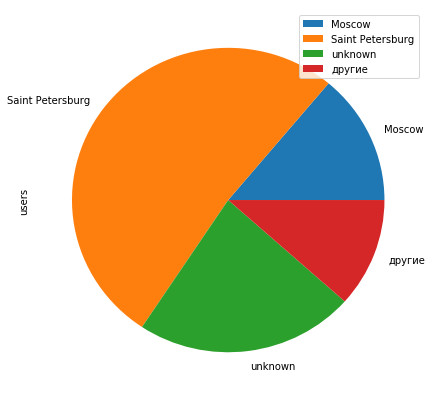

In [45]:
df.head().plot(kind = 'pie', y = 'users', figsize= (7, 7))

Для создания полноценного отчета по лучшим публикациям нам необходимо выделять посты, которые были опубликованы в определенный период. На данном этапе будем использовать самый простой вариант: берем последние 100 постов группы и фильтруем те, что были опубликованы вчера. Мы продолжаем работать с группой https://vk.com/habr .

Начнем с импорта токена и формирования запроса к API ВКонтакте методом wall.get (https://vk.com/dev/wall.get):

In [46]:
import requests
from yaml import load
from pprint import pprint
with open('config_example.yaml', 'r') as f:
    config = load(f)
token = config['access_token']
url = 'https://api.vk.com/method/wall.get'
params = {
    'domain': 'habr',
    'filter': 'owner',
    'count': 100,
    'offset': 0,
    'access_token': token,
    'v': 5.73
}
data = requests.get(url, params = params)

In [6]:
pprint(data.json())

{'response': {'count': 99818,
              'items': [{'attachments': [{'photo': {'access_key': 'cd7524d88b63f53e0a',
                                                    'album_id': -7,
                                                    'date': 1551878132,
                                                    'height': 420,
                                                    'id': 456261352,
                                                    'owner_id': -20629724,
                                                    'photo_130': 'https://sun9-34.userapi.com/c635101/v635101569/41c06/E5bKrzvjWoc.jpg',
                                                    'photo_604': 'https://sun9-3.userapi.com/c635101/v635101569/41c07/R3ZWmICn-QQ.jpg',
                                                    'photo_75': 'https://sun9-3.userapi.com/c635101/v635101569/41c05/XhRLARh3XiY.jpg',
                                                    'photo_807': 'https://sun9-19.userapi.com/c635101/v635101569/41c08/LwWH

                        {'attachments': [{'photo': {'access_key': 'cbf3f5fc09f3556582',
                                                    'album_id': -7,
                                                    'date': 1552671020,
                                                    'height': 300,
                                                    'id': 456261847,
                                                    'owner_id': -20629724,
                                                    'photo_130': 'https://sun9-12.userapi.com/c635101/v635101641/4a289/HMN3Q-e04Q4.jpg',
                                                    'photo_604': 'https://sun9-27.userapi.com/c635101/v635101641/4a28a/VETv2yZUZdw.jpg',
                                                    'photo_75': 'https://sun9-8.userapi.com/c635101/v635101641/4a288/GSRa-JzCxVY.jpg',
                                                    'photo_807': 'https://sun9-7.userapi.com/c635101/v635101641/4a28b/MqW4cqlX_MI.jpg',
                

                         'post_type': 'post',
                         'reposts': {'count': 1, 'user_reposted': 0},
                         'text': 'SIBUR CHALLENGE в Нижнем Новгороде.\n'
                                 '\n'
                                 'Уже через пару недель СИБУР проведёт '
                                 'хакатон, посвящённый анализу данных. Отбор '
                                 'команд будет идти до 30 марта, задачи нужно '
                                 'будет решать не абстрактные, а вполне живые '
                                 '— будут предоставлены реальные данные '
                                 'компании: http://amp.gs/44pF\n'
                                 '\n'
                                 '#разработка@habr #разное@habr',
                         'views': {'count': 18236}},
                        {'attachments': [{'photo': {'access_key': 'c9eb0938a16c458f96',
                                                    'album_id': -7,
        

                                                    'photo_604': 'https://sun9-2.userapi.com/c635101/v635101517/3b68e/ql15WNuTzPg.jpg',
                                                    'photo_75': 'https://sun9-11.userapi.com/c635101/v635101517/3b68c/d_CMKF0yCc0.jpg',
                                                    'photo_807': 'https://sun9-27.userapi.com/c635101/v635101517/3b68f/vCZY6-YSaHo.jpg',
                                                    'post_id': 1177334,
                                                    'text': 'Что курил '
                                                            'конструктор: '
                                                            'необычное '
                                                            'огнестрельное '
                                                            'оружие.\n'
                                                            '\n'
                                                            'Не только военные '
  

                                                    'date': 1552633238,
                                                    'height': 600,
                                                    'id': 456261789,
                                                    'owner_id': -20629724,
                                                    'photo_1280': 'https://pp.userapi.com/c635101/v635101683/3e8ad/6ZZWPAI0qDY.jpg',
                                                    'photo_130': 'https://pp.userapi.com/c635101/v635101683/3e8aa/t6TVCqxnPfU.jpg',
                                                    'photo_604': 'https://pp.userapi.com/c635101/v635101683/3e8ab/VJspb8NNZaM.jpg',
                                                    'photo_75': 'https://pp.userapi.com/c635101/v635101683/3e8a9/jqepeGkRoWo.jpg',
                                                    'photo_807': 'https://pp.userapi.com/c635101/v635101683/3e8ac/32kmS9WOoJQ.jpg',
                                                    'post

                                                    'date': 1552581924,
                                                    'height': 1339,
                                                    'id': 456261770,
                                                    'owner_id': -20629724,
                                                    'photo_1280': 'https://pp.userapi.com/c635101/v635101143/3f046/fIUuGrCSo_k.jpg',
                                                    'photo_130': 'https://pp.userapi.com/c635101/v635101143/3f043/XWc1DoDiMVQ.jpg',
                                                    'photo_2560': 'https://pp.userapi.com/c635101/v635101143/3f047/h1l015kLhHY.jpg',
                                                    'photo_604': 'https://pp.userapi.com/c635101/v635101143/3f044/Y9DmfGWLSP0.jpg',
                                                    'photo_75': 'https://pp.userapi.com/c635101/v635101143/3f042/wJ_nS-4XOnc.jpg',
                                                    'ph

                                                    'text': 'Такой же, как на '
                                                            'Луне: обратный '
                                                            'инжиниринг модуля '
                                                            'гибридного '
                                                            'операционного '
                                                            'усилителя.\n'
                                                            '\n'
                                                            'В разработке '
                                                            'этого компонента '
                                                            'принимали участие '
                                                            'несколько '
                                                            'значимых людей в '
                                                            'истории развития '


                                      'count': 2,
                                      'groups_can_post': True},
                         'date': 1552563048,
                         'from_id': -20629724,
                         'id': 1176783,
                         'likes': {'can_like': 1,
                                   'can_publish': 1,
                                   'count': 85,
                                   'user_likes': 0},
                         'marked_as_ads': 0,
                         'owner_id': -20629724,
                         'post_source': {'type': 'api'},
                         'post_type': 'post',
                         'reposts': {'count': 8, 'user_reposted': 0},
                         'text': '35% доходность акций на альтернативных '
                                 'данных.\n'
                                 '\n'
                                 '«На днях попал в руки любопытный датасет от '
                                 'Московской Б

                         'text': 'Ноутбук Compaq Armada 7700 как развитие '
                                 'линейки Compaq LTE.\n'
                                 '\n'
                                 'Если Compaq LTE 5000 — модель 95-96 годов, '
                                 'то Armada 7700 — уже 97-98, более '
                                 'современный, но ещё недалеко ушедший от LTE '
                                 'ноут. Тем интереснее было посмотреть '
                                 'различия и направление эволюции: '
                                 'http://amp.gs/4gki\n'
                                 '\n'
                                 '#гиктаймс@habr',
                         'views': {'count': 27465}},
                        {'attachments': [{'photo': {'access_key': 'b095210ca035e5cfae',
                                                    'album_id': -7,
                                                    'date': 1552546844,
                                

In [7]:
pprint(data.json()['response']['items'][0])

{'attachments': [{'photo': {'access_key': 'cd7524d88b63f53e0a',
                            'album_id': -7,
                            'date': 1551878132,
                            'height': 420,
                            'id': 456261352,
                            'owner_id': -20629724,
                            'photo_130': 'https://sun9-34.userapi.com/c635101/v635101569/41c06/E5bKrzvjWoc.jpg',
                            'photo_604': 'https://sun9-3.userapi.com/c635101/v635101569/41c07/R3ZWmICn-QQ.jpg',
                            'photo_75': 'https://sun9-3.userapi.com/c635101/v635101569/41c05/XhRLARh3XiY.jpg',
                            'photo_807': 'https://sun9-19.userapi.com/c635101/v635101569/41c08/LwWHB8-8--U.jpg',
                            'post_id': 1173634,
                            'text': 'Тимлид под прикрытием.\n'
                                    '\n'
                                    'Московская TeamLead Conf собрала 1137 '
                           

Нужная нам статистика находится в полях 'comments', 'likes' и 'reposts'. Соберем итоговую статистику для каждого поста в словарь stats. В качестве ключа будем использовать название статьи, в качестве значения — лист с тремя интересующими нас метриками и временем публикации: [комментарии, лайки, репосты, дата публикации]. Первую строку с количеством постов не будем учитывать с помощью знакомого примера с переменной Started. API ВКонтакте возвращает два типа записей, для их корректной обработки ставим проверку "if 'attachments' in record":

In [8]:
Started = True
stats = {}
for record in data.json()['response']['items']:
    if Started:
        Started = False    
    else:
        if 'attachments' in record:
            if 'link' in record['attachments'][0]:
                title = record['attachments'][0]['link']['title']
            elif 'photo' in record['attachments'][0]:
                title = record['attachments'][0]['photo']['text']
        elif 'copy_history' in record:
            if 'link' in record['copy_history'][0]['attachments'][0]:
                title = record['copy_history'][0]['attachments'][0]['link']['title']
            elif 'poll' in record['copy_history'][0]['attachments'][0]:
                title = record['copy_history'][0]['attachments'][0]['poll']['question']
        stats[title] = [record['comments']['count'], record['likes']['count'], record['reposts']['count'], record['date'] ]

pprint(stats)

{'13 марта после консультаций с Федеральной авиационной администрацией США и клиентами, компания Boeing выпустила официальную рекомендацию всем авиакомпаниями временно приостановить полёты самолёта Boeing 737 MAX.\n\nРешению предшествовали две авиакатастрофы: http://amp.gs/44jP\n\n#гиктаймс@habr': [0,
                                                                                                                                                                                                                                                                                                            16,
                                                                                                                                                                                                                                                                                                            2,
                                                                                          

Отсортируем результат по количеству комментариев (первый элемент листа [комментарии, лайки, репосты]) и оставим топ-10:

In [18]:
for title, line in sorted( stats.items(), key = lambda x: -x[1][0] )[:10]:
    print(title, line)

Требуется «Team Lead (Node.js)» [95, 123, 13, 1552561212, '2019-03-14']
Король разработки [84, 945, 118, 1552503607, '2019-03-13']
Выбор авто для айтишника, или Советы чайникам от чайника.

Проблема наступает в тот момент, когда айтишник решается на покупку авто. Перед ним открывается целый мир с которым он никогда не сталкивался, мир с кучей подводных камней и граблей: http://amp.gs/4vUM

#гиктаймс@habr [76, 243, 17, 1552501844, '2019-03-13']
Совет Федерации принял законы о неуважении к власти и фейковых новостях.

Согласно новым правилам, за публикацию неправдивой информации физлица могут быть наказаны штрафом до 100 тыс. руб., должностные лица — до 200 тыс. руб., юрлица — до 500 тыс. руб.: http://amp.gs/4gM7

#управление@habr [60, 88, 25, 1552562128, '2019-03-14']
За сутки в Telegram прибавилось три миллиона пользователей.

Приток аудитории мессенджера совпал с глобальным сбоем Facebook, включая сервисы на его инфраструктуре, такие как Facebook Messenger, Instagram и — главное — Wha

На прошлом шаге мы получили список постов с комментариями, лайками, репостами и датой публикации в UNIX-формате. Осталось отфильтровать результаты по дате, чтобы оставить посты только за вчерашний день. Переведем время публикации постов из UNIX-формата в дату:

In [11]:
from datetime import datetime, timedelta
for title, line in stats.items():
   line.append(datetime.fromtimestamp(line[3]).strftime('%Y-%m-%d'))
print(line)

[7, 26, 2, 1552495544, '2019-03-13']


In [12]:
yesterday = (datetime.now() - timedelta(days = 1)).strftime('%Y-%m-%d')
print(yesterday)
'2018-03-20'

2019-03-14


'2018-03-20'

In [14]:
for title, line in sorted( stats.items(), key = lambda x: -(x[1][0]+x[1][1]+x[1][2]) ):
    if line[4] == yesterday:
        print(title, line) #Выводим обновленный рейтинг лучших постов с фильтром на вчерашнюю дату:

Как браузер помогает товарищу майору [29, 662, 87, 1552590005, '2019-03-14']
Вода камень точит.

«Давным-давно я написал статью на Хабр с названием «Интенсивность важнее тщательности» про то, что лучше увеличить количество попыток сделать что-то, чем продолжительность одной попытки. Теперь я хочу дополнить эту мысль»: http://amp.gs/4EWb

#управление@habr #разное@habr [4, 297, 51, 1552582773, '2019-03-14']
Получаем ссылки на профили VK из выдачи SearchFace с помощью Python.

Сегодня мы поговорим о лёгком распознавании лиц с помощью доступных инструментов. Используются Python 3.6, SearchFace, внешний сервис для преобразования ссылок на фото в id: http://amp.gs/4g97

#разработка@habr #гиктаймс@habr [10, 286, 34, 1552552230, '2019-03-14']
«Каждый скачанный файл с помощью любого Chromium-совместимого браузера (проверено в lxc-контейнере на Chrome, Chromiun, Yandex и Opera) записывает в расширенные атрибуты файлы, укромно спрятанные в файловую систему».

Как браузер помогает товарищу майору: